В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [27]:
from process_bank_churn import preprocess_data, preprocess_new_data


File with data preprocessing https://github.com/andriana-zd/machine_learning/blob/main/process_bank_churn.py

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [8]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2'

In [9]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrianazadorozhna
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 90.1MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [10]:
import os

In [11]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-2'

In [12]:
os.listdir(data_dir)

['test.csv', 'train.csv', 'sample_submission.csv']

In [13]:
train_csv = data_dir + '/train.csv'

In [14]:
import pandas as pd

In [63]:
raw_df = pd.read_csv(train_csv)

In [70]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [102]:
import importlib
import process_bank_churn
importlib.reload(process_bank_churn)


<module 'process_bank_churn' from '/content/process_bank_churn.py'>

In [103]:
from process_bank_churn import preprocess_data, preprocess_new_data

processed_data = preprocess_data(raw_df)

X_train = processed_data['train_X']
y_train = processed_data['train_y']
X_val = processed_data['val_X']
y_val = processed_data['val_y']
X_test = processed_data['test_X']
y_test = processed_data['test_y']


/content/process_bank_churn.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Заповнення пропущених значень для числових даних
/content/process_bank_churn.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputer = SimpleImputer(strategy='mean')
/content/process_bank_churn.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [107]:
X_train, y_train = processed_data['train_X'], processed_data['train_y']
X_val, y_val = processed_data['val_X'], processed_data['val_y']

In [108]:
X_train = X_train.drop(columns=['id'], errors='ignore')
X_val = X_val.drop(columns=['id'], errors='ignore')

In [109]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [110]:
train_auc = roc_auc_score(y_train, tree_clf.predict_proba(X_train)[:, 1])
val_auc = roc_auc_score(y_val, tree_clf.predict_proba(X_val)[:, 1])

In [120]:
print(f"Train AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

Train AUC: 1.0000
Validation AUC: 0.7664


In [119]:
#  Model Overfitting Check
if train_auc > 0.9 and val_auc < 0.75:
    print(" Model is overfitting (high train AUC, low validation AUC).")
elif train_auc < 0.7 and val_auc < 0.7:
    print("Model is underfitting (low performance on both train & val).")
else:
    print("Model has a good balance between bias & variance.")


Model has a good balance between bias & variance.


In [118]:
# Tree Depth
print(f" Tree Depth: {tree_clf.get_depth()}")

# Train a Shallow Decision Tree (Max Depth = 2)
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)

print("\nFeatures used in Depth-2 Tree:")
print(pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": shallow_tree.feature_importances_
}).sort_values(by="Importance", ascending=False).head(10))


 Tree Depth: 25

Features used in Depth-2 Tree:
             Feature  Importance
1                Age     0.69161
4      NumOfProducts     0.30839
0        CreditScore     0.00000
2             Tenure     0.00000
3            Balance     0.00000
5          HasCrCard     0.00000
6     IsActiveMember     0.00000
7    EstimatedSalary     0.00000
8   Geography_France     0.00000
9  Geography_Germany     0.00000


In [115]:
# Feature Importance Analysis
from IPython.display import display

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": tree_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(feature_importance_df)


,Feature,Importance
1,Age,0.346836
4,NumOfProducts,0.175862
7,EstimatedSalary,0.123753
0,CreditScore,0.108620
3,Balance,0.085063
2,Tenure,0.058711
6,IsActiveMember,0.034239
9,Geography_Germany,0.022222
5,HasCrCard,0.016308
12,Gender_Male,0.010216


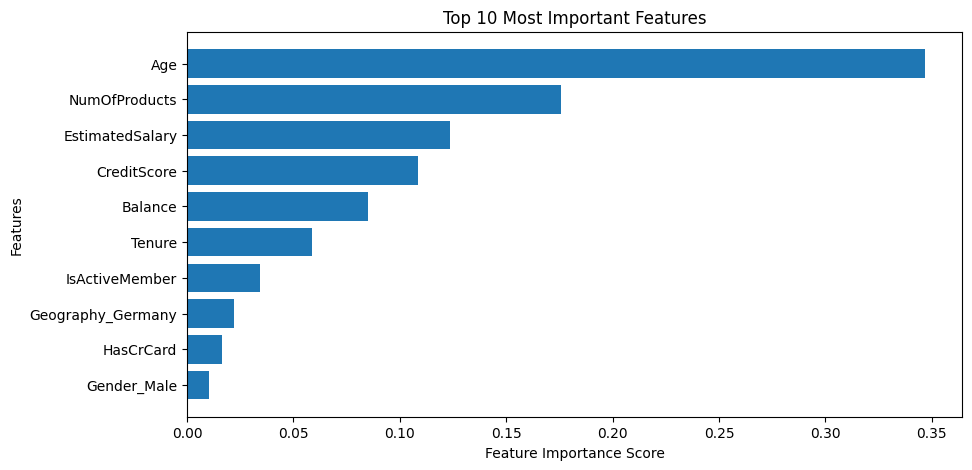

In [116]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [121]:
max_depth_values = range(1, 20, 2)
max_leaf_nodes_values = range(5, 50, 5)

results = []

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:

        tree_clf = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
        tree_clf.fit(X_train, y_train)


        train_auc = roc_auc_score(y_train, tree_clf.predict_proba(X_train)[:, 1])
        val_auc = roc_auc_score(y_val, tree_clf.predict_proba(X_val)[:, 1])

        # save results
        results.append({'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes, 'train_auc': train_auc, 'val_auc': val_auc})


In [122]:
results_df = pd.DataFrame(results)

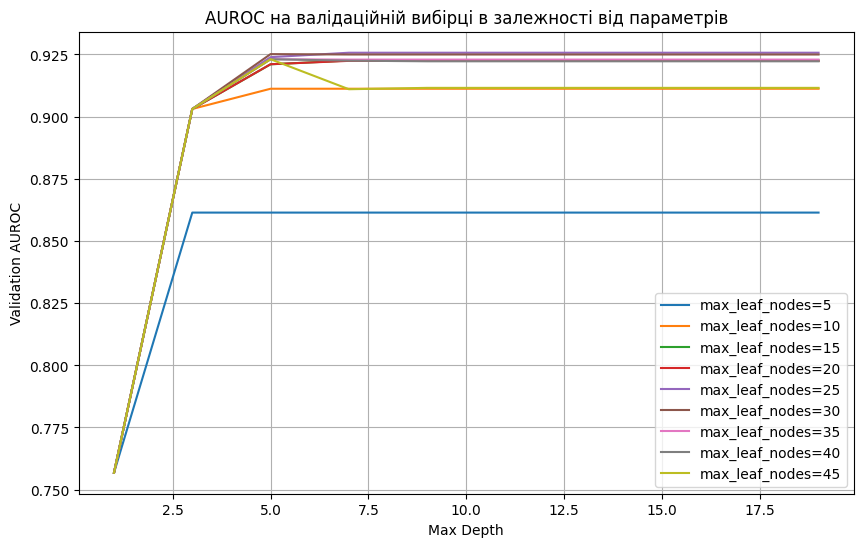

In [123]:
plt.figure(figsize=(10, 6))
for max_leaf_nodes in max_leaf_nodes_values:
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(subset['max_depth'], subset['val_auc'], label=f'max_leaf_nodes={max_leaf_nodes}')

plt.xlabel('Max Depth')
plt.ylabel('Validation AUROC')
plt.title('AUROC на валідаційній вибірці в залежності від параметрів')
plt.legend()
plt.grid()
plt.show()

In [124]:
best_params = results_df.loc[results_df['val_auc'].idxmax()]
print("Найкращі параметри:", best_params)

Найкращі параметри: max_depth          7.000000
max_leaf_nodes    25.000000
train_auc          0.923449
val_auc            0.925651
Name: 31, dtype: float64


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [125]:
depth_results = []

In [126]:
for max_depth in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)

    train_auc = roc_auc_score(y_train, tree.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_val, tree.predict_proba(X_val)[:, 1])

    depth_results.append({"max_depth": max_depth, "train_auc": train_auc, "val_auc": val_auc})

In [127]:
depth_results_df = pd.DataFrame(depth_results)

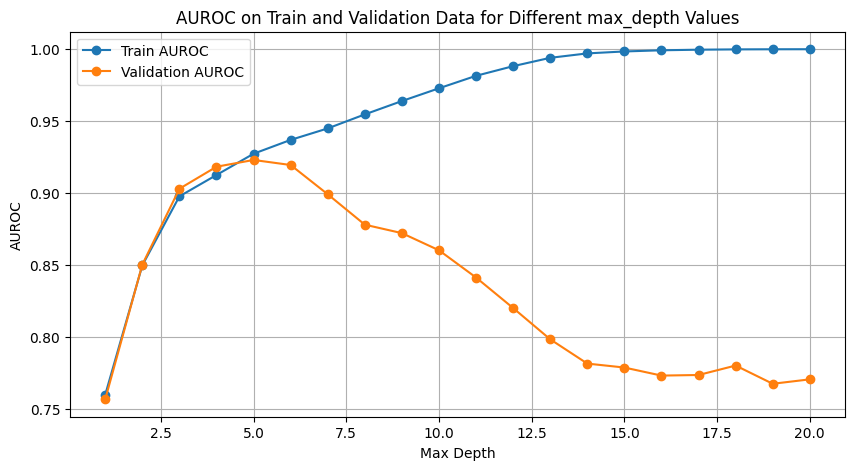

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(depth_results_df["max_depth"], depth_results_df["train_auc"], label="Train AUROC", marker='o')
plt.plot(depth_results_df["max_depth"], depth_results_df["val_auc"], label="Validation AUROC", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("AUROC")
plt.title("AUROC on Train and Validation Data for Different max_depth Values")
plt.legend()
plt.grid()
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [132]:
best_max_depth = int(best_params["max_depth"])
best_max_leaf_nodes = int(best_params["max_leaf_nodes"])

final_model = DecisionTreeClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes, random_state=42)
final_model.fit(X_train, y_train)

print(f"Модель натренована з max_depth={best_max_depth} і max_leaf_nodes={best_max_leaf_nodes}")


Модель натренована з max_depth=7 і max_leaf_nodes=25


In [129]:
test_csv = data_dir + '/test.csv'
test_df = pd.read_csv(test_csv)


In [130]:
new_processed_data = preprocess_new_data(
    test_df,
    processed_data['scaler'],
    processed_data['encoder'],
    processed_data['numeric_cols'],
    processed_data['categorical_cols']
)


In [134]:
test_ids = new_processed_data["id"]

new_processed_data = new_processed_data.drop(columns=["id"])

test_predictions = final_model.predict_proba(new_processed_data)[:, 1]

submission_df = pd.DataFrame({"id": test_ids, "exited": test_predictions})

print(submission_df.head())


      id    exited
0  15000  0.169884
1  15001  0.018270
2  15002  0.162500
3  15003  0.812500
4  15004  0.088692


In [135]:
submission_df.to_csv("submission.csv", index=False)

import os
print("Файл submission.csv збережено:", os.path.exists("submission.csv"))


Файл submission.csv збережено: True
